**LOGISTIC REGRESSION**

**1. It is a technique commonly used for binary classification. Here we use it for multiple classification ie assigning the pixels to one of 10 values (1-10 numbers)**

**2. It fits a sigmoid curve rather than a straight line (linear regression) to better account for outliers**

**3. Logistic regression uses probabilities obtained from logistic function to decide which class an instance belongs to, with a threshold separating the two classes.**

**Advantages and Disadvantages:**

**1. Gives straightforward easy to understand results by offering probabilities for each. Usually applied to small-medium datasets.**

**2. Struggles with complex relationships and may not capture them.**

**3. Usually more robust to noise and handles outliers better than linear regression models. But extreme (value or quantity) outliers may have negative impact.**

**4. Assumes each observation is independant. This would be an inaccurate assumption in some cases such as time-series type datasets.**    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("D:/Code/Python Projects/MNIST Handwriting/Data/train.csv")

In [4]:
test = pd.read_csv("D:/Code/Python Projects/MNIST Handwriting/Data/test.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y=train['label']
X=train.drop('label',axis=1)
x_for_test_data=test[:]

3


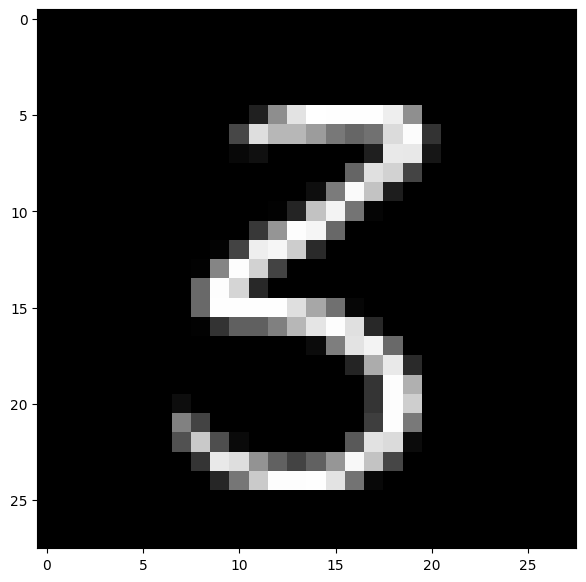

In [8]:
import random
plt.figure(figsize=(7,7))
some_digit=random.randint(0,50)
some_digit_image = X.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [9]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1000)
classifier.fit(X_train, y_train)

D:\Apps\Py\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

In [11]:
y_prediction=classifier.predict(X_test)

In [12]:
y_prediction

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy of given model is:",round(accuracy_score(y_test, y_prediction)*100,3),"%")

Accuracy of given model is: 91.833 %


In [14]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.90      0.89      0.89       937
           4       0.93      0.93      0.93       839
           5       0.87      0.87      0.87       702
           6       0.93      0.96      0.95       785
           7       0.93      0.92      0.93       893
           8       0.88      0.88      0.88       835
           9       0.90      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [15]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[787,   0,   2,   2,   3,  13,   6,   1,   2,   0],
       [  0, 887,   6,   0,   1,   4,   1,   2,   7,   1],
       [  5,  12, 758,  13,   9,   9,  11,   8,  20,   1],
       [  2,   3,  26, 831,   0,  24,   1,   9,  25,  16],
       [  5,   1,   5,   1, 779,   1,  11,   3,   5,  28],
       [  7,   2,   7,  25,   8, 610,  18,   2,  20,   3],
       [  7,   1,   6,   0,   3,   7, 754,   1,   5,   1],
       [  0,   2,   6,  12,  13,   2,   1, 819,   6,  32],
       [  4,  11,   8,  28,   6,  25,   6,   4, 738,   5],
       [  7,   3,   2,  12,  20,   8,   0,  28,   7, 751]], dtype=int64)

<Axes: >

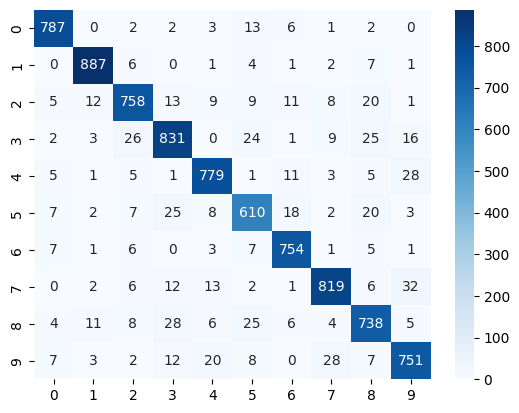

In [16]:
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap='Blues')

**OBTAINED ACCURACY FOR THIS MODEL : 91.833%**